# Discriminant Correspondence Analysis (DISCA)

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
# Chargement de la base
import pandas as pd
D = pd.read_excel("./data/Data_Illustration_Livre_ADL.xlsx",sheet_name="DIVAY",header=0)
D

,Region,Woody,Fruity,Sweet,Alcohol,Hedonic
0,Loire,A,C,B,A,A
1,Loire,B,C,C,B,C
2,Loire,A,B,B,A,B
3,Loire,A,C,C,B,D
4,Rhone,A,B,A,C,C
5,Rhone,B,A,A,C,B
6,Rhone,C,B,B,B,A
7,Rhone,B,C,C,C,D
8,Beaujolais,C,A,C,A,A
9,Beaujolais,B,A,C,A,B


In [3]:
from discrimintools import DISCA

In [4]:
disca = DISCA(n_components=None,target=["Region"],priors="prop",parallelize=False)

disca.fit(D)

DISCA(priors='prop', target=['Region'])

## Affectation d'un individu supplementarire

In [5]:
# Individus supplémentaires
Xsup = pd.DataFrame({
    "Woody" : "A","Fruity" : "C", "Sweet" : "B", "Alcohol" : "B", "Hedonic" : "A"
},index=[12])
Xsup

,Woody,Fruity,Sweet,Alcohol,Hedonic
12,A,C,B,B,A


In [6]:
disca.transform(Xsup)

,Dim.1,Dim.2
12,-1.006603,-0.153958


In [7]:
disca.decision_function(Xsup)

,Beaujolais,Loire,Rhone
12,2.501952,0.126952,1.841952


In [8]:
disca.predict_proba(Xsup)

,Beaujolais,Loire,Rhone
12,0.176372,0.578301,0.245327


In [9]:
disca.predict(Xsup)

12    Loire
Name: prediction, dtype: object

## Analyse Factorielles des Correspondances

### Individus (groupes - classes)

In [10]:
row = disca.classes_
row.keys()

dict_keys(['coord', 'contrib', 'cos2', 'infos', 'classes', 'dist2', 'dist'])

In [11]:
### Coordonnées factorielles
row["coord"].head(6)

,Dim.1,Dim.2
Beaujolais,0.556908,-0.393515
Loire,-0.659534,-0.234552
Rhone,0.102626,0.628067


In [12]:
### Cos2
row["cos2"].head(6)

,Dim.1,Dim.2
Beaujolais,0.666981,0.333019
Loire,0.887725,0.112275
Rhone,0.026005,0.973995


In [13]:
### Contributions
row["contrib"].head(6)

,Dim.1,Dim.2
Beaujolais,41.042884,25.623783
Loire,57.563349,9.103318
Rhone,1.393768,65.272899


In [14]:
### Distance à 2
row["dist2"]

,dist2
Region,
Beaujolais,0.465
Loire,0.490
Rhone,0.405


In [15]:
### Distance entre les classes
row["dist"]

,Beaujolais,Loire,Rhone
Beaujolais,0.000,1.505,1.250
Loire,1.505,0.000,1.325
Rhone,1.250,1.325,0.000


### Variables/modalités

In [16]:
var = disca.var_
var.keys()

dict_keys(['coord', 'contrib', 'cos2', 'infos'])

In [17]:
## Coordonnées des indicatrices
var["coord"].head(6)

,Dim.1,Dim.2
Woody_A,-0.934466,-0.042104
Woody_B,0.051121,0.349838
Woody_C,0.883346,-0.307734
Fruity_A,0.883346,-0.307734
Fruity_B,0.051121,0.349838
Fruity_C,-0.934466,-0.042104


In [18]:
### Conributions aux facteurs
var["contrib"].head(6)

,Dim.1,Dim.2
Woody_A,23.111530,0.058667
Woody_B,0.069166,4.050284
Woody_C,20.652034,3.134028
Fruity_A,20.652034,3.134028
Fruity_B,0.069166,4.050284
Fruity_C,23.111530,0.058667


## Analyse discriminante

### Coefficients des fonctions discriminantes canoniques

In [19]:
disca.coef_

,Dim.1,Dim.2
Woody_A,-0.372383,-0.018762
Woody_B,0.020371,0.155890
Woody_C,0.352012,-0.137128
Fruity_A,0.352012,-0.137128
Fruity_B,0.020371,0.155890
Fruity_C,-0.372383,-0.018762
Sweet_A,0.201720,0.285476
Sweet_B,-0.130918,-0.058217
Sweet_C,-0.016297,-0.124712
Alcohol_A,0.055843,-0.327562


### Coordonnées des individus

In [20]:
# Coordonnées des individus
ind = disca.ind_
ind.keys()

dict_keys(['coord'])

In [21]:
ind["coord"]

,Dim.1,Dim.2
0,-0.819841,-0.423303
1,-0.499227,-0.045801
2,-0.427087,-0.248651
3,-0.891982,-0.220453
4,-0.068806,1.046165
5,0.655588,0.927798
6,0.110547,-0.097673
7,-0.286823,0.635976
8,0.743569,-0.726531
9,0.411929,-0.433513


## Autres fonctions

### fit transform

In [22]:
disca.fit_transform(D)

,Dim.1,Dim.2
0,-0.819841,-0.423303
1,-0.499227,-0.045801
2,-0.427087,-0.248651
3,-0.891982,-0.220453
4,-0.068806,1.046165
5,0.655588,0.927798
6,0.110547,-0.097673
7,-0.286823,0.635976
8,0.743569,-0.726531
9,0.411929,-0.433513


### tranform()

In [23]:
disca.transform(D)

,Dim.1,Dim.2
0,-0.819841,-0.423303
1,-0.499227,-0.045801
2,-0.427087,-0.248651
3,-0.891982,-0.220453
4,-0.068806,1.046165
5,0.655588,0.927798
6,0.110547,-0.097673
7,-0.286823,0.635976
8,0.743569,-0.726531
9,0.411929,-0.433513


### decision_function

In [24]:
disca.decision_function(D)

,Beaujolais,Loire,Rhone
0,1.896325,0.061325,1.956325
1,1.236325,0.061325,0.816325
2,0.989231,0.054231,1.049231
3,2.129231,0.054231,1.709231
4,2.464195,1.989195,0.204195
5,1.755606,3.080606,0.395606
6,0.286761,0.611761,0.526761
7,1.771733,0.896733,0.151733
8,0.145742,2.210742,2.245742
9,0.022619,1.187619,1.222619


### predict_proba

In [25]:
disca.predict_proba(D)

,Beaujolais,Loire,Rhone
0,0.223540,0.559526,0.216933
1,0.247944,0.446172,0.305884
2,0.280391,0.447504,0.272104
3,0.197791,0.558198,0.244011
4,0.186437,0.236417,0.577146
5,0.286579,0.147749,0.565672
6,0.365372,0.310572,0.324056
7,0.208475,0.322892,0.468633
8,0.586148,0.208736,0.205115
9,0.474538,0.265030,0.260432


### predict()

In [26]:
disca.predict(D)

0          Loire
1          Loire
2          Loire
3          Loire
4          Rhone
5          Rhone
6     Beaujolais
7          Rhone
8     Beaujolais
9     Beaujolais
10    Beaujolais
11    Beaujolais
Name: prediction, dtype: object

### pred_table()

In [27]:
disca.pred_table()

prediction,Beaujolais,Loire,Rhone
Region,,,
Beaujolais,4,0,0
Loire,0,4,0
Rhone,1,0,3


## Extraction

In [28]:
from discrimintools import get_disca, summaryDISCA
ind = get_disca(disca, choice="ind")
var = get_disca(disca,choice="var")
coef = get_disca(disca,choice="coef")
classes = get_disca(disca,choice="classes")

In [29]:
summaryDISCA(disca)

                     Discriminant Correspondence Analysis - Results                     


Class Level information

            Frequency  Proportion  Prior Probability
Region                                              
Beaujolais          4    0.333333           0.333333
Loire               4    0.333333           0.333333
Rhone               4    0.333333           0.333333

Canonical coeffcients

           Dim.1  Dim.2
Woody_A   -0.372 -0.019
Woody_B    0.020  0.156
Woody_C    0.352 -0.137
Fruity_A   0.352 -0.137
Fruity_B   0.020  0.156
Fruity_C  -0.372 -0.019
Sweet_A    0.202  0.285
Sweet_B   -0.131 -0.058
Sweet_C   -0.016 -0.125
Alcohol_A  0.056 -0.328
Alcohol_B -0.131 -0.058
Alcohol_C  0.081  0.624
Hedonic_A  0.000  0.000
Hedonic_B  0.000  0.000
Hedonic_C  0.000  0.000
Hedonic_D  0.000  0.000

Individuals (the 10 first)

   Dim.1  Dim.2
0 -0.820 -0.423
1 -0.499 -0.046
2 -0.427 -0.249
3 -0.892 -0.220
4 -0.069  1.046
5  0.656  0.928
6  0.111 -0.098
7 -0.287  0.636
8  0.744 -0.72

## Visualisation

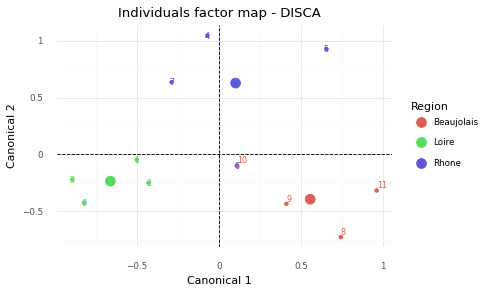

In [30]:
from discrimintools import fviz_disca_ind, fviz_disca_mod
p = fviz_disca_ind(disca)
print(p)

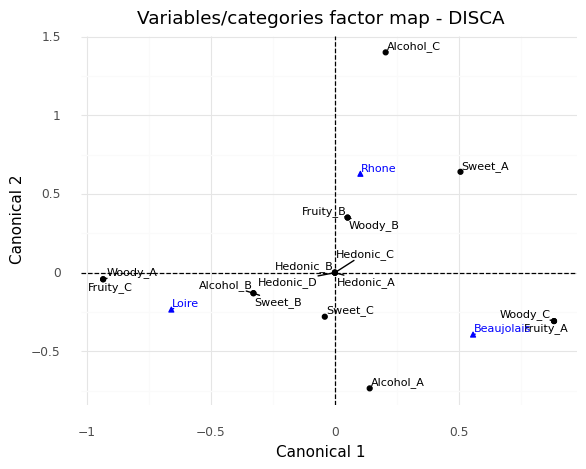

In [31]:
p = fviz_disca_mod(disca,repel=True)
print(p)